# The Relationship between Athlete Shape and Running Distance
I'm naively assuming that, when trying to run as fast as possible, there is a fundamental tradeoff: 
* on one side, having a lot of strength allows the body to exert more force to move forward; 
* on the other hand, being as small as possible means less energy expense to move the said body around.

Stereotypical sprint runners (e.g. Usain Bolt) tend to be muscular.
Stereotypical long distance runners (e.g. Hicham El Guerrouj) tend to be small.
We'll here try to find the approximate inflexion point where athletes go from the former "shape" to the second body type.


In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'
import re

## 1. Retrieve an clean up the data
Athlete stats from [The Guardian](http://www.theguardian.com/sport/datablog/2012/aug/07/olympics-2012-athletes-age-weight-height#data). We're only interested in Athletics here, so drop the other sports/events, and change a few names to get the distance in metres.

In [2]:
df=pd.read_csv("london-2012-athletes.csv")
df=df[df.Sport=="Athletics"]
df.replace(to_replace={'Event':{r'0,000m' : "000m",
                                r'km' : "000m",
                                r'Marathon' : "42195m",
                                r'4 x 100m' : "100m",
                                r'4 x 400m' : "400m",
                                }
                      }, inplace=True, regex=True)
df=df.reset_index()

Some athletes take part in multiple events; split each event into its own row.

In [3]:
s = pd.DataFrame(df.Event.str.split(',').tolist()).stack()
s.index = s.index.droplevel(-1)
s.name='Event'
df.drop('Event', axis=1, inplace=True)

df=df.join(s)

Drop events that aren't runs (throws and jumps) as well as hurdles. Relays are kept in the dataset.

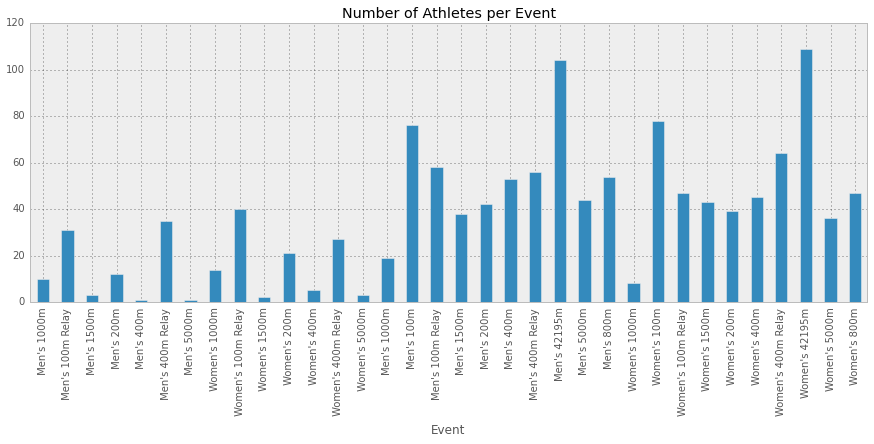

In [4]:
sports_to_ignore = ['Hammer', 'Shot', 'Hurdles', 'Javelin', 'Vault', 'Decathlon', 'Heptathlon', 'Jump', 'Discus', 'Steeplechase', 'Race Walk']
ignore_pattern = '|'.join(sports_to_ignore)
df=df[~df.Event.str.contains(ignore_pattern, flags=re.IGNORECASE)]
df=df.reset_index()

_=df.Event.groupby(df.Event).count().sort_index().plot(kind="bar", title="Number of Athletes per Event")

## 2. Calculate the Body Mass Index (BMI) of each athlete
The BMI is by no means a perfect descriptor of the athlete's "shape". we can however guess (and confirm below) that sprint runners tend to have a high BMI compared to long-distance runners.

In [5]:
df['Distance']=df.apply(lambda row: int("".join(filter(str.isdigit, row['Event']))),
                        axis=1)
df['BMI']=df['Weight']/df['Height, cm']*100
df[['Name', 'Distance', 'BMI', 'Sex']].head()

,Name,Distance,BMI,Sex
0,Jamale Aarrass,1500,40.641711,M
1,Abdihakem Abdirahman,42195,33.888889,M
2,Dana Abdul Razak,100,33.333333,F
3,Layes Abdullayeva,5000,27.647059,F
4,Endurance Abinuwa,400,33.962264,F


## 3. Visually estimate the inflexion point when being small becomes more advantageous than being strong

C:\perso\Python34\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


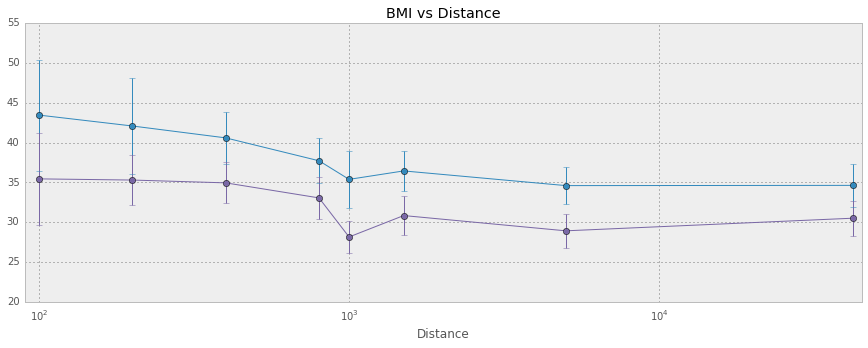

In [6]:
fig, axs = plt.subplots(1,1)


mean_m=df[df.Sex=='M'].groupby("Distance").mean()['BMI']
std_m=df[df.Sex=='M'].groupby("Distance").std()['BMI']

mean_f=df[df.Sex=='F'].groupby("Distance").mean()['BMI']
std_f=df[df.Sex=='F'].groupby("Distance").std()['BMI']

mean_m.plot(ax=axs, logx=True, title="BMI vs Distance", marker='o', yerr=std_m)
mean_f.plot(ax=axs, logx=True, marker='o', yerr=std_f)

axs.set_ylim(bottom=20)
_=axs.set_xlim(left=90, right=45000)


What can we conclude?